In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Revise
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/rmg_K.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/rmg_3pV.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")

ell_k (generic function with 1 method)

In [2]:
# Fix mBZ length-scale
mbz_kappa = 1

1

<font size="12">$$N_L \ \mathrm{vs} \ \ell_\kappa, \ell_{\kappa^\prime}$$</font>

In [3]:
NL = 10

10

In [4]:
# 1 layer potential
function rmg_all_ell_vs_NL(kappa, Nl)
    P = Figure(size=(2000, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"), markersize = 25)

    Nl_list = collect(1:Nl)
    momenta = Array{Float64}(undef, Nl)

    for l in 1:Nl
        momenta[l] = ell_k(-limit_delta_all(l))
    end
    ax1 = Axis(P[1, 1], xlabel = L"N_L", ylabel = L"\ell_\kappa = \ell_{\kappa^\prime}", 
    title = L"N_L \text{ vs } \ell_\kappa = \ell_{\kappa^\prime}", 
    titlefont = :regular, titlegap = 20)
    scatter!(ax1, Nl_list, momenta)
    P
end


rmg_all_ell_vs_NL (generic function with 1 method)

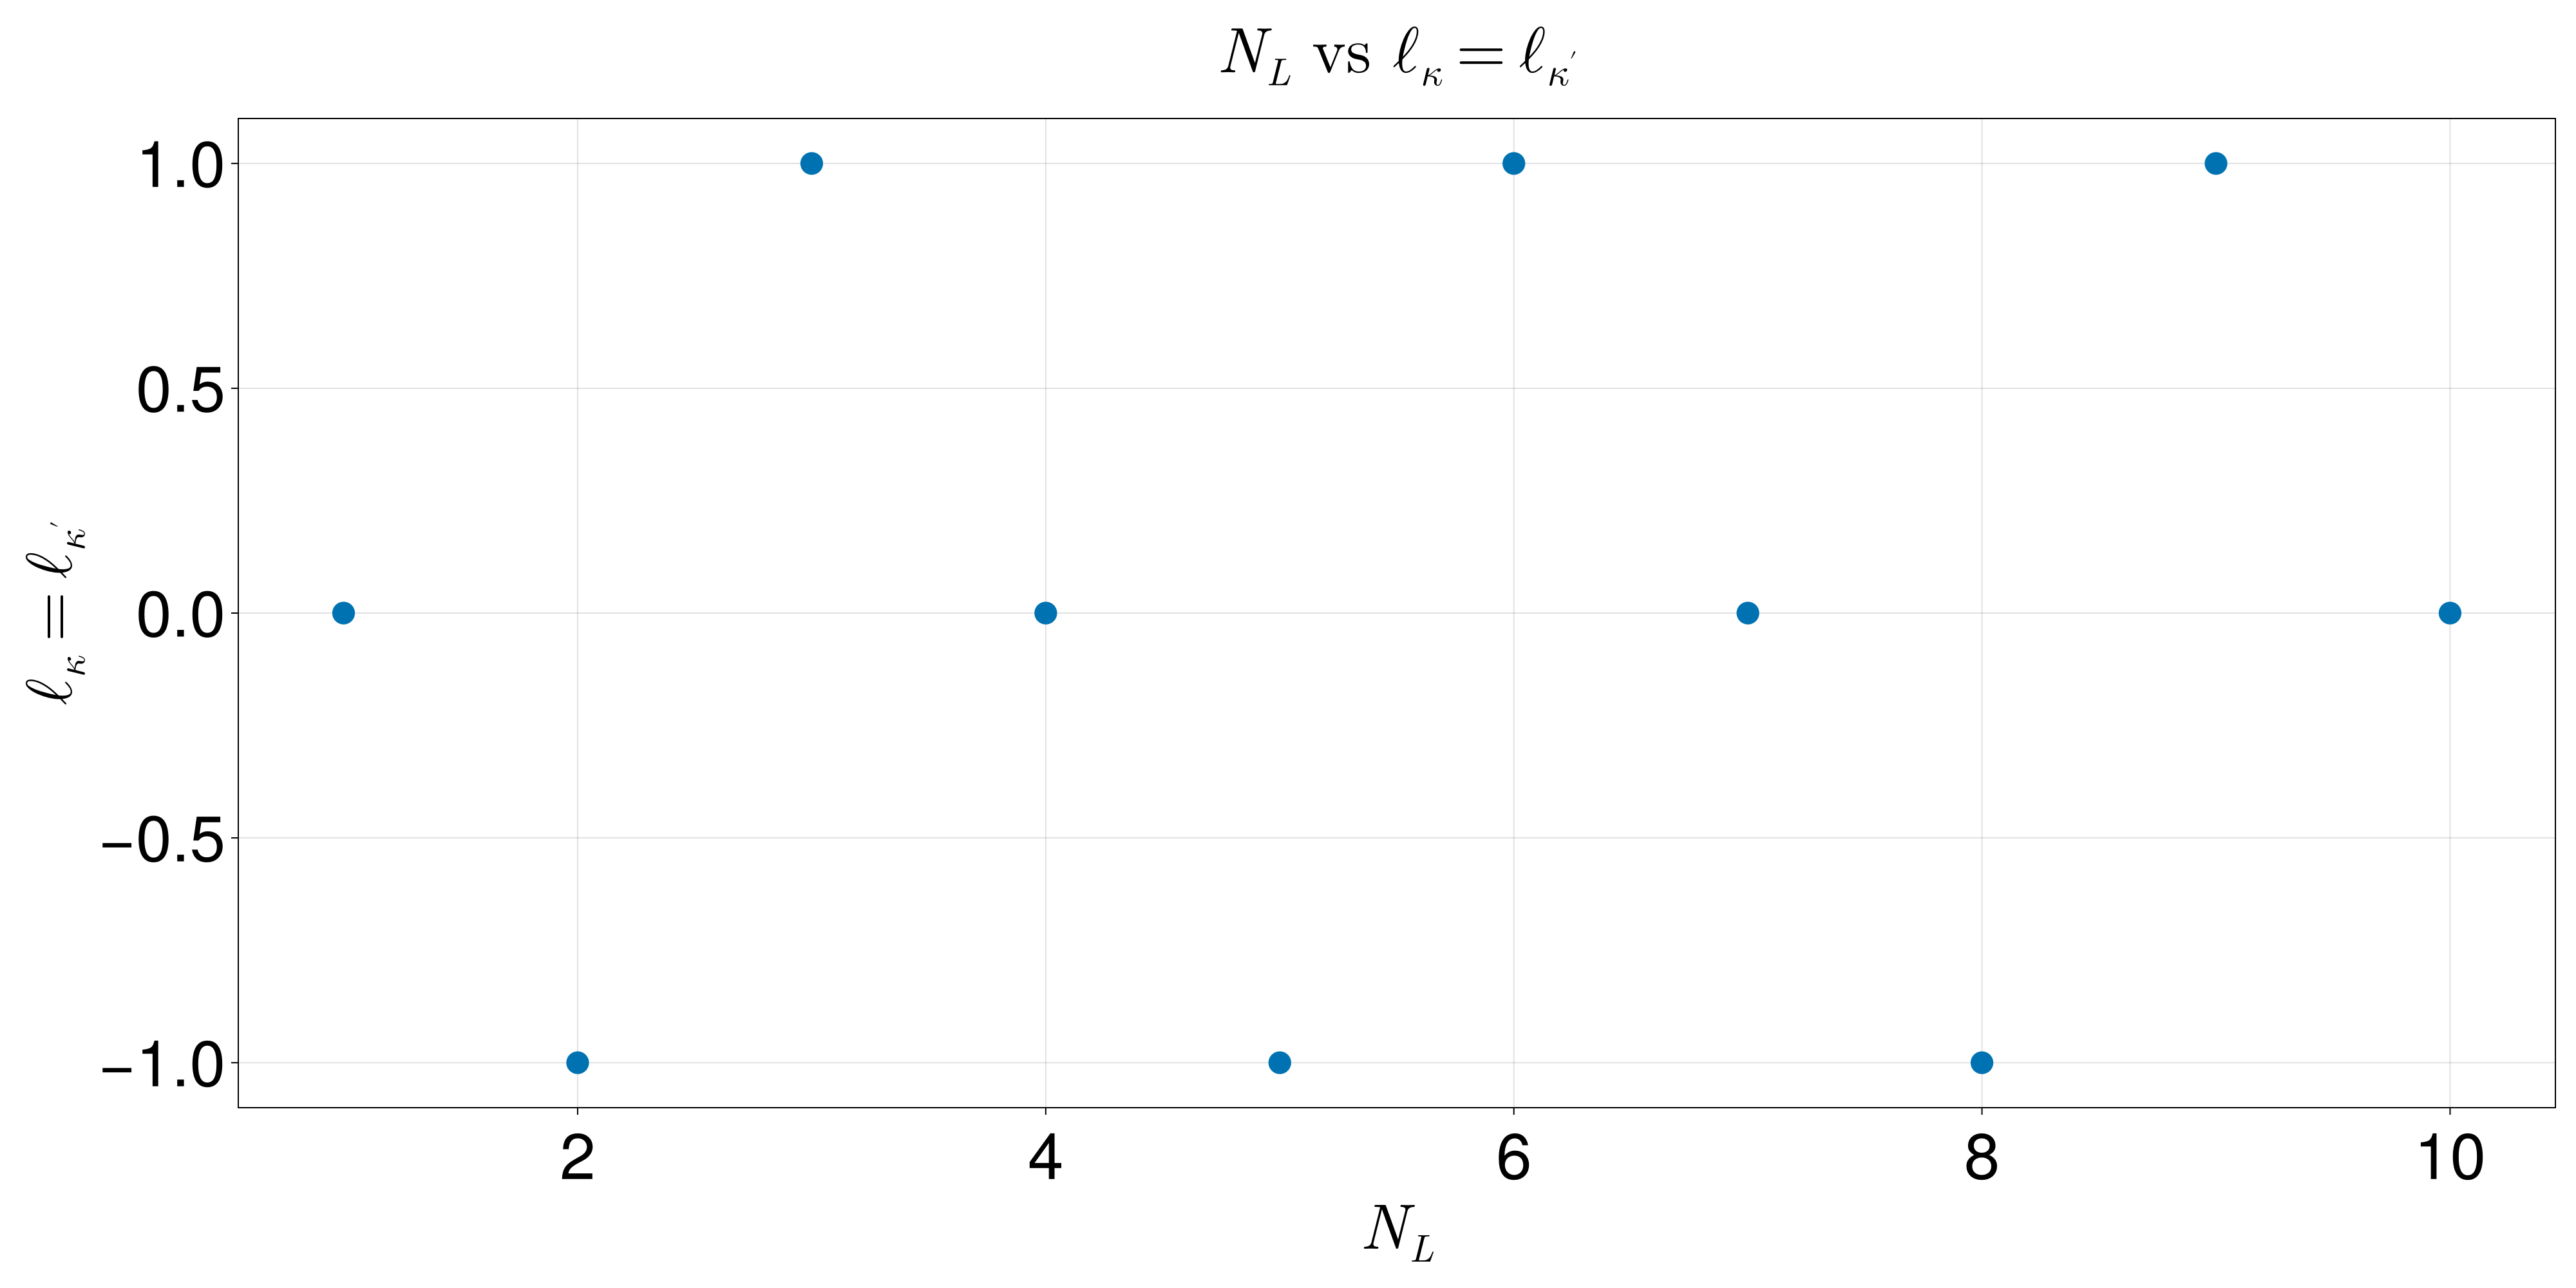

In [5]:
rmg_all_ell_vs_NL(mbz_kappa, NL)

<font size="12">$$\nu \ \mathrm{vs} \ \ell_\kappa, \ell_{\kappa^\prime}$$</font>

In [6]:
NL = 5

5

In [7]:
# 1 layer potential
function rmg_all_nu_vs_NL(kappa, Nl)
    P = Figure(size=(3500, 1200), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    nu_pts = 10^2
    nu_list = range(0, 5, nu_pts)
    l_list = collect(1:Nl)
    momenta = Array{Float64}(undef, Nl, nu_pts)

    for l in 1:Nl
        for i in 1:nu_pts
            momenta[l, i] = ell_k(-rmg_delta_all(kappa, nu_list[i], l))
        end
        big_ax = Axis(P[:, l], title = string("N_L = ")*string(l_list[l]), titlegap = 160, titlefont = :weird, titlesize = 50)
        hidedecorations!(big_ax, label = false)
        hidespines!(big_ax)

        ax1 = Axis(P[1, l], xlabel = L"\nu", ylabel = L"\ell_\kappa = \ell_{\kappa^\prime}", 
        title = L"\nu \text{ vs } \ell_\kappa = \ell_{\kappa^\prime}", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, nu_list, momenta[l, :])
    end
    P
end


rmg_all_nu_vs_NL (generic function with 1 method)

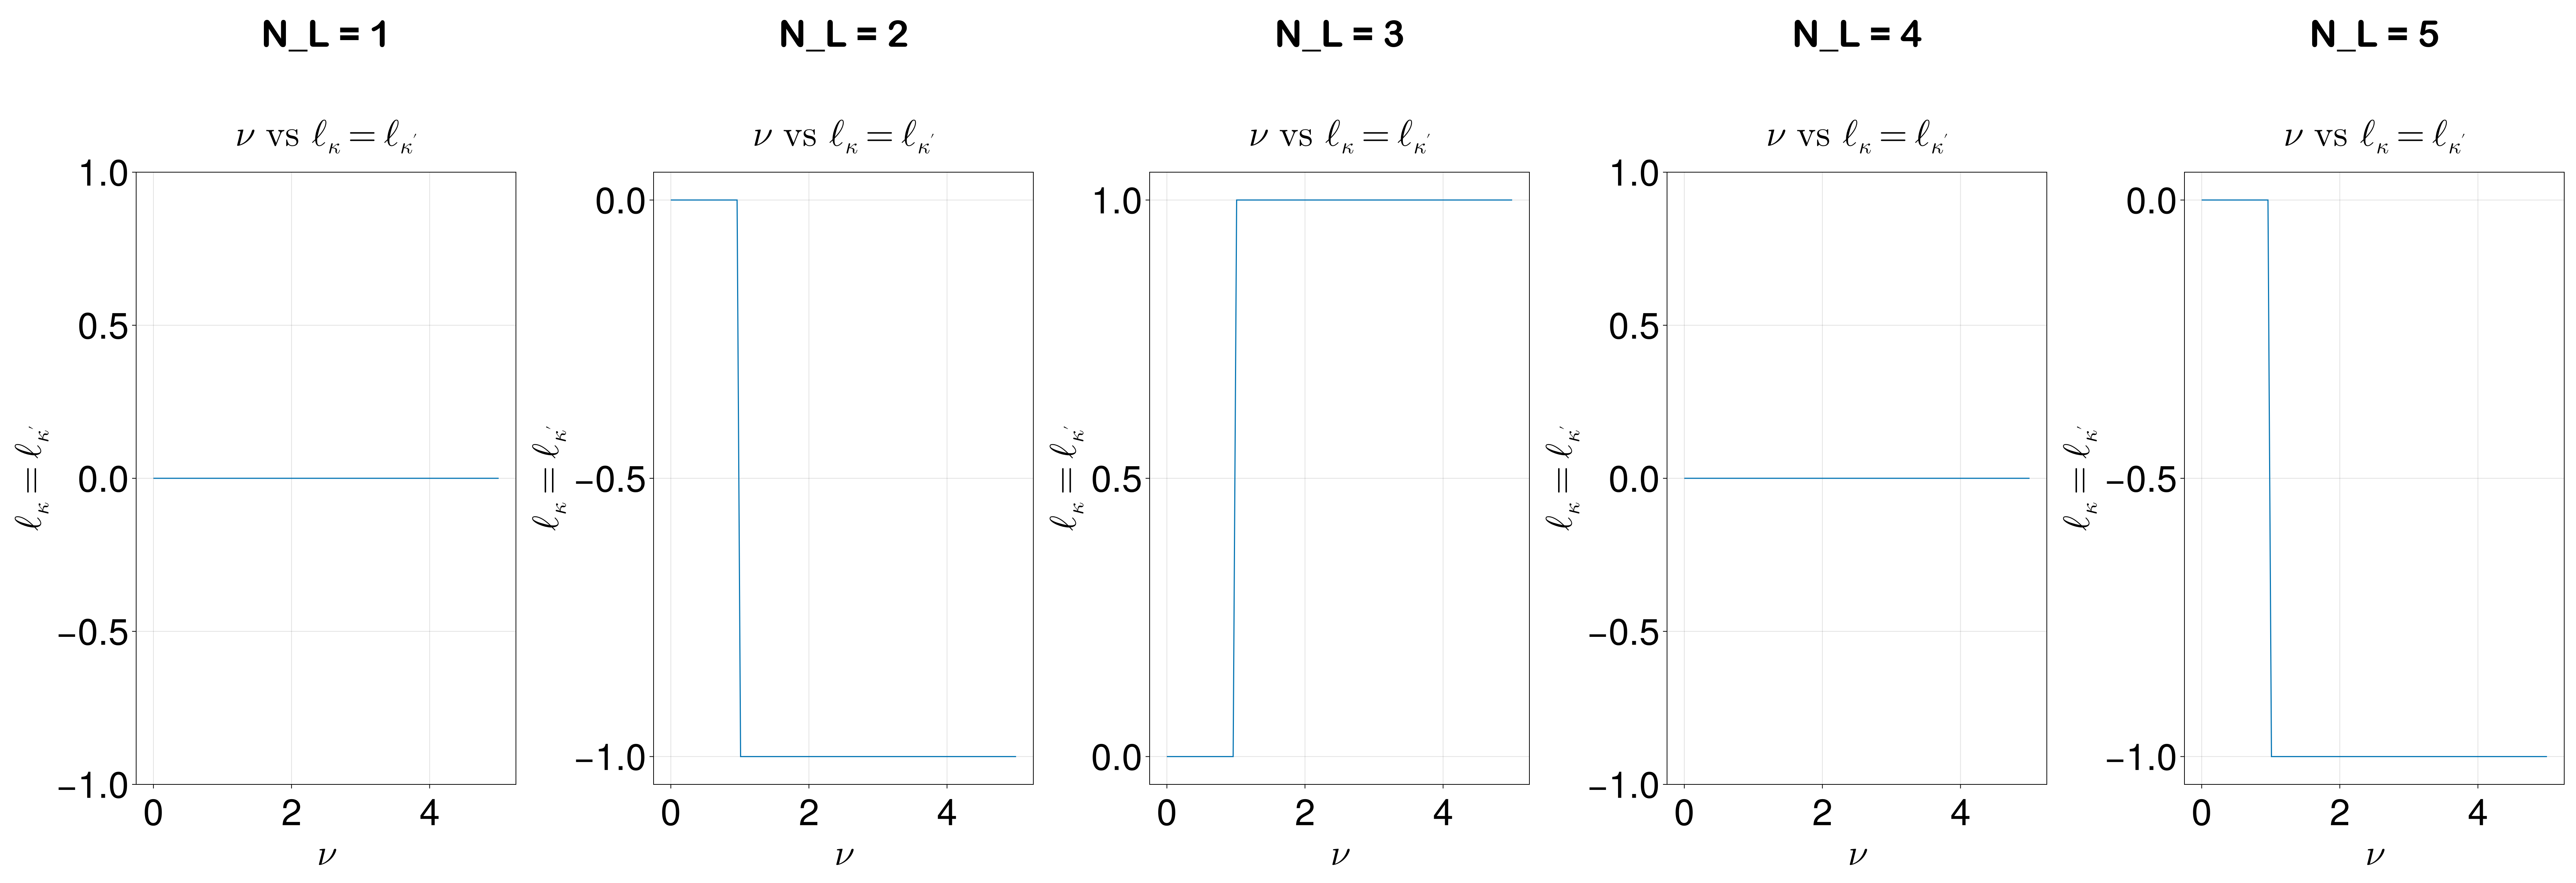

In [8]:
rmg_all_nu_vs_NL(mbz_kappa, NL)

In [9]:
# 1 layer potential
function rmg_1l_nu_vs_NL(kappa, Nl)
    P = Figure(size=(3500, 1200), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    nu_pts = 10^2
    nu_list = range(0, 5, nu_pts)
    l_list = collect(1:Nl)
    momenta = Array{Float64}(undef, Nl, nu_pts)

    for l in 1:Nl
        for i in 1:nu_pts
            momenta[l, i] = ell_k(-rmg_delta_layers(kappa, nu_list[i], Nl, [l]))
        end
        big_ax = Axis(P[:, l], title = string("l = ")*string(l_list[l]), titlegap = 160, titlefont = :weird, titlesize = 50)
        hidedecorations!(big_ax, label = false)
        hidespines!(big_ax)

        ax1 = Axis(P[1, l], xlabel = L"\nu", ylabel = L"\ell_\kappa = \ell_{\kappa^\prime}", 
        title = L"\nu \text{ vs } \ell_\kappa = \ell_{\kappa^\prime}", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, nu_list, momenta[l, :])
    end
    P
end


rmg_1l_nu_vs_NL (generic function with 1 method)

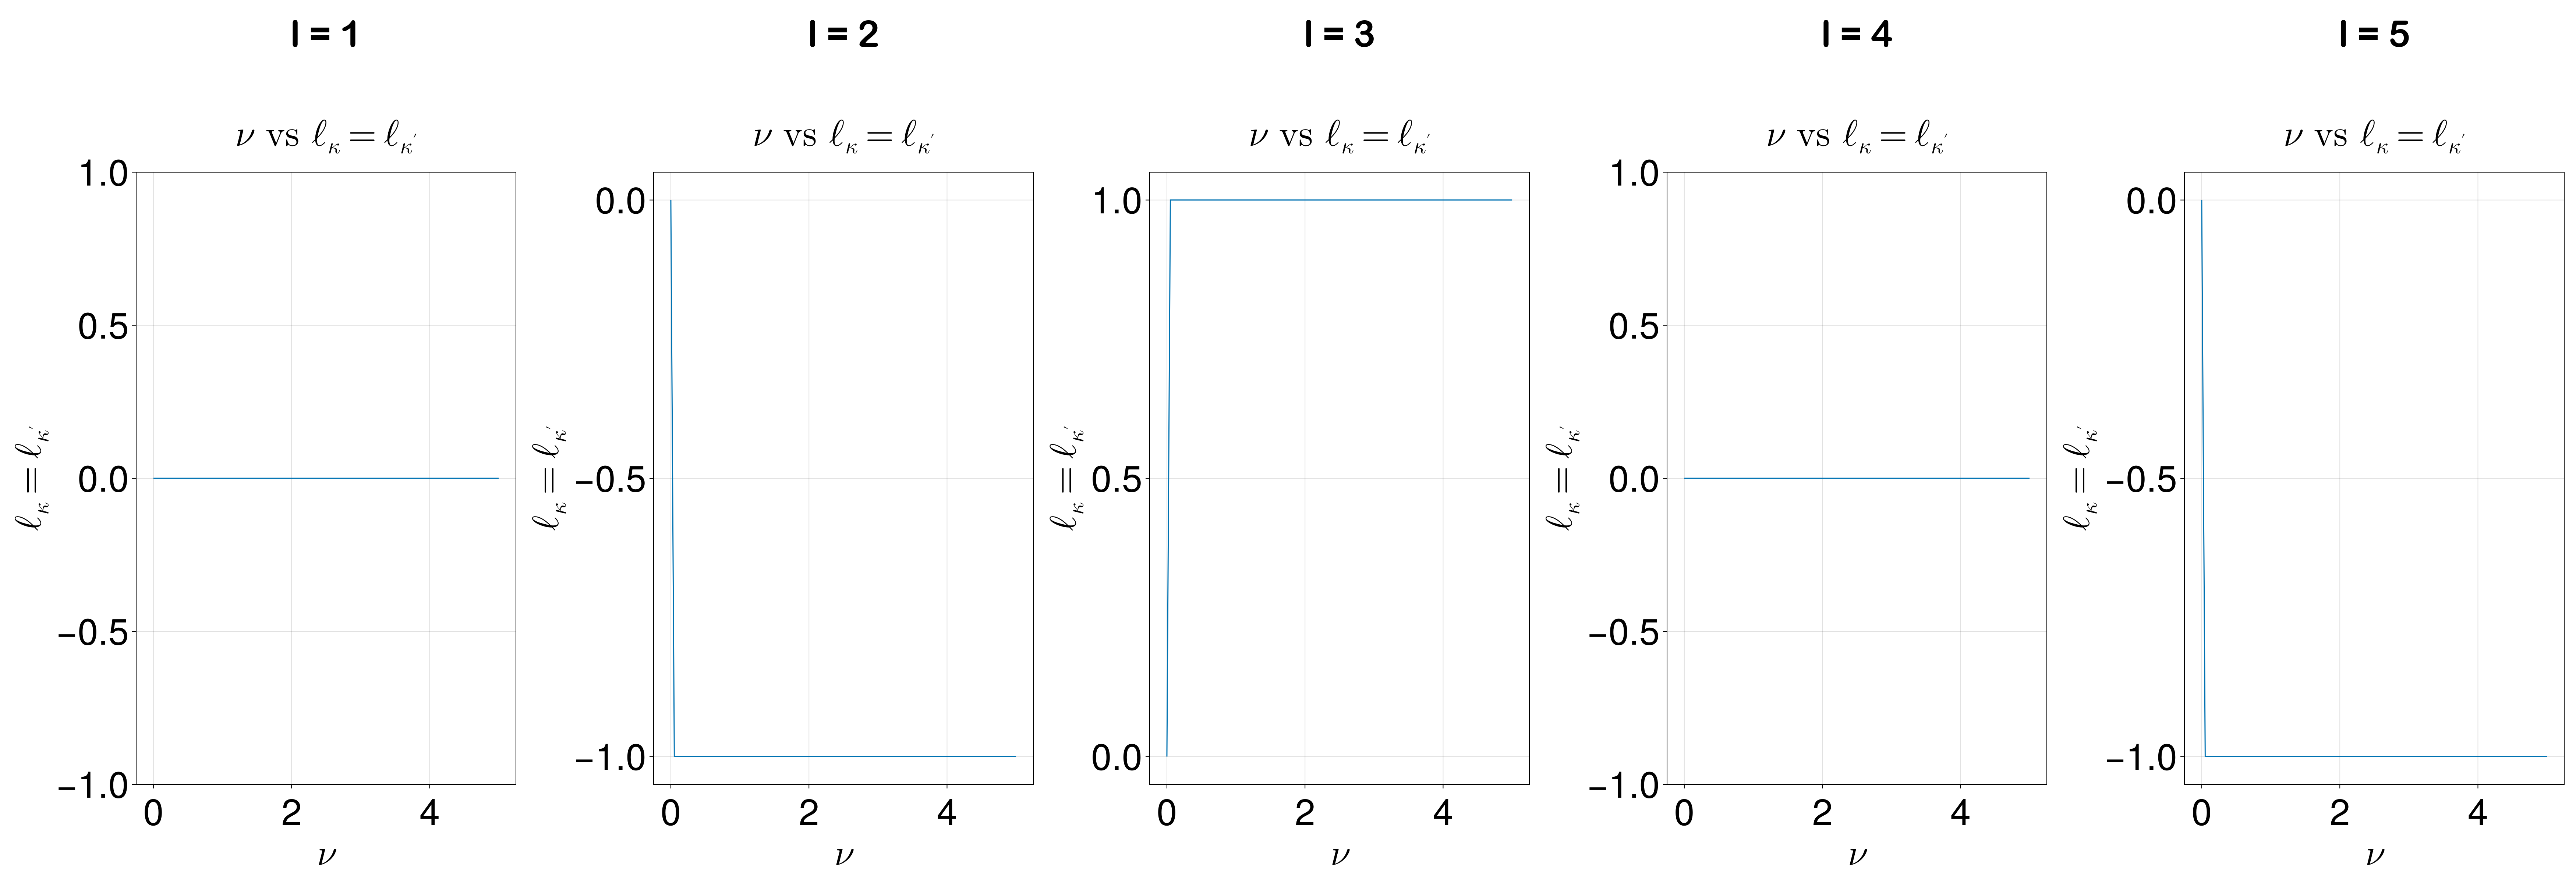

In [10]:
rmg_1l_nu_vs_NL(mbz_kappa, NL)

<font size="12">$$(N_L, \nu) \ \mathrm{vs} \ C$$</font>

In [11]:
NL = 10

10

In [12]:
# N_L layer potential
function rmg_chern_nu_Nl_contour(kappa)
    nu_pts = 10^2
    Nl_pts = 10
    nu_list = range(0, 2, nu_pts)
    Nl_list = collect(1:Nl_pts)
    grid = mesh_grid(nu_list, Nl_list, Float64)
    cherns = Array{Float64}(undef, nu_pts * Nl_pts)
    p2_points = Point2f[]
    zero_points = Point2f[]
    m2_points = Point2f[]
    for j in 1:nu_pts * Nl_pts
        cherns[j] = 2 * ell_k(-rmg_delta_all(kappa, grid[j, 1], grid[j, 2]))
        if cherns[j] == -2
            push!(m2_points, Point2f(grid[j, 1], grid[j, 2]))
        elseif cherns[j] == 2
            push!(p2_points, Point2f(grid[j, 1], grid[j, 2]))
        else
            push!(zero_points, Point2f(grid[j, 1], grid[j, 2]))
        end
    end

    fig = Figure(size=(2000, 1500), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], title = L"(\nu, N_L) \ \text{ vs } \ C", xlabel = L"\nu", 
    ylabel = L"N_L")
    scatter!(ax1, p2_points, color=:red, markersize=12, label = L"C = -1")
    scatter!(ax1, zero_points, color=:green, markersize=12, label = L"C = 0")
    scatter!(ax1, m2_points, color=:blue, markersize=12, label = L"C = 1")
    fig[1, 2] = Legend(fig, ax1, framevisible = true)
    
    fig
end


rmg_chern_nu_Nl_contour (generic function with 1 method)

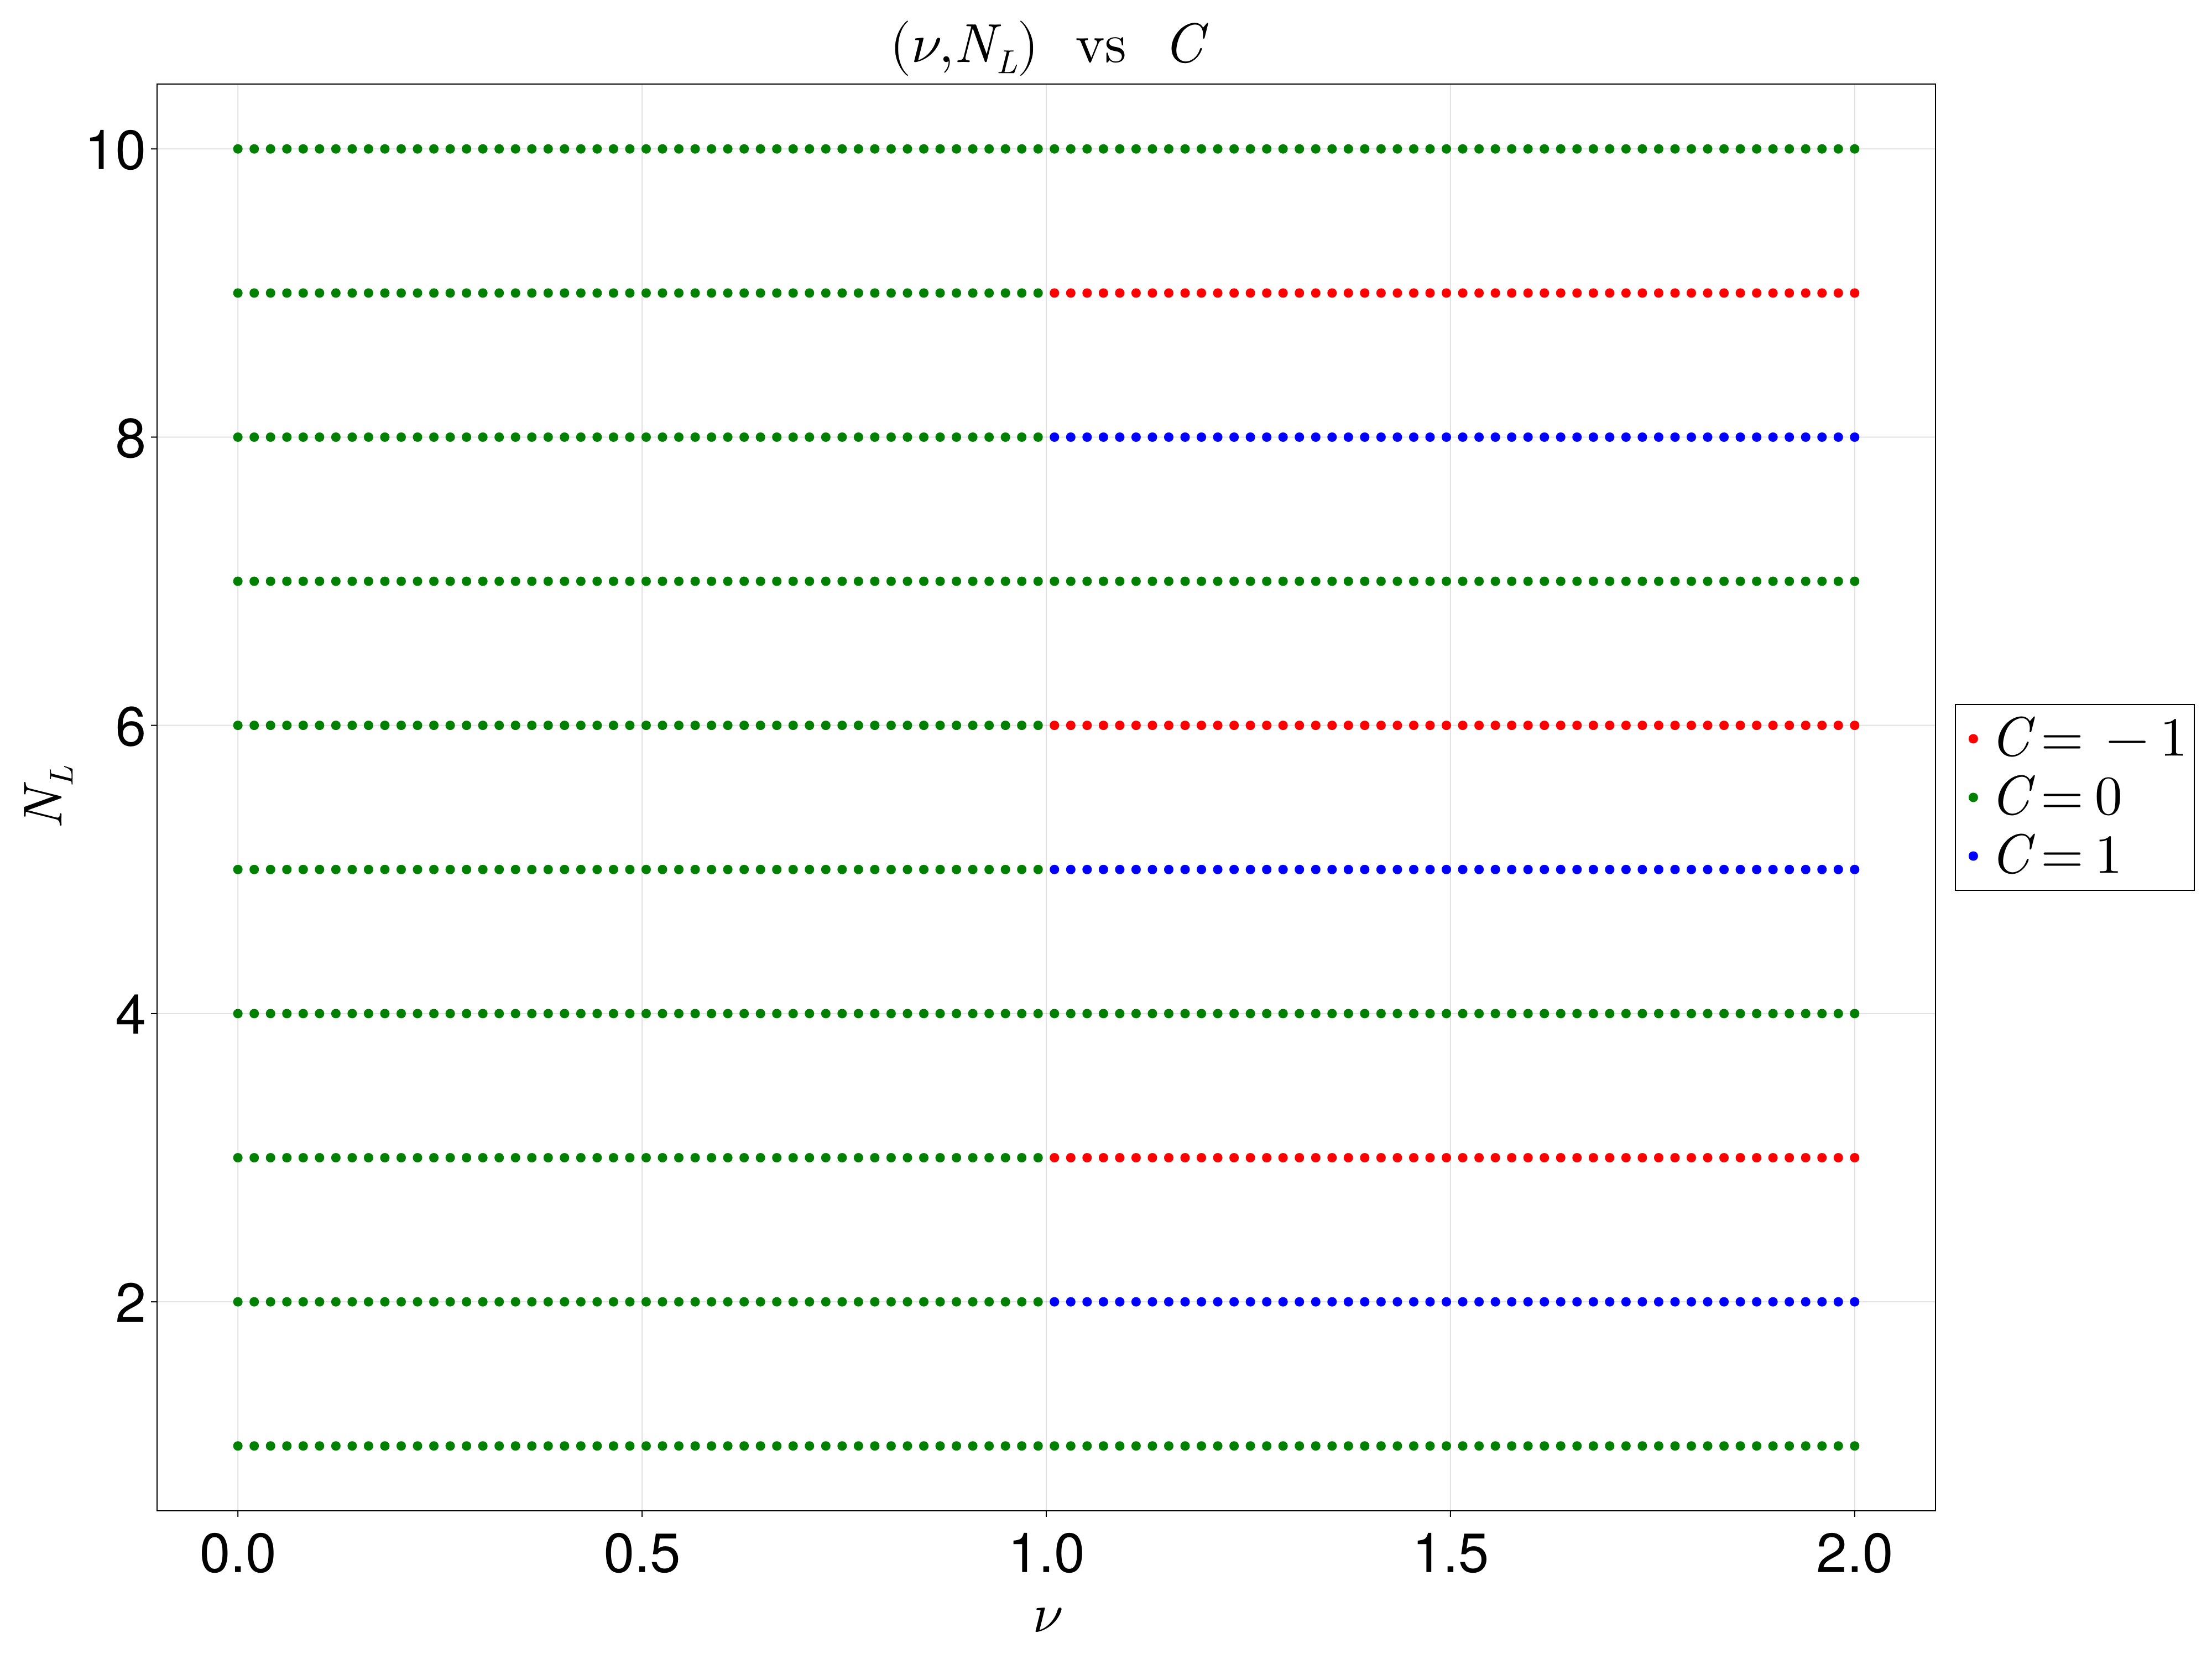

In [13]:
rmg_chern_nu_Nl_contour(mbz_kappa)

In [14]:
# N_L layer potential
function rmg_chern_nu_l_contour(kappa, Nl)
    nu_pts = 10^2
    nu_list = range(0, 2, nu_pts)
    l_list = collect(1:Nl)
    grid = mesh_grid(nu_list, l_list, Float64)
    cherns = Array{Float64}(undef, nu_pts * Nl)
    p2_points = Point2f[]
    zero_points = Point2f[]
    m2_points = Point2f[]
    for j in 1:nu_pts * Nl
        cherns[j] = 2 * ell_k(-rmg_delta_layers(kappa, grid[j, 1], Nl, [grid[j, 2]]))
        if cherns[j] == -2
            push!(m2_points, Point2f(grid[j, 1], grid[j, 2]))
        elseif cherns[j] == 2
            push!(p2_points, Point2f(grid[j, 1], grid[j, 2]))
        else
            push!(zero_points, Point2f(grid[j, 1], grid[j, 2]))
        end
    end

    fig = Figure(size=(2000, 1500), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], title = L"(\nu, \ell) \ \text{ vs } \ C", xlabel = L"\nu", 
    ylabel = L"\ell")
    scatter!(ax1, p2_points, color=:red, markersize=12, label = L"C = -1")
    scatter!(ax1, zero_points, color=:green, markersize=12, label = L"C = 0")
    scatter!(ax1, m2_points, color=:blue, markersize=12, label = L"C = 1")
    fig[1, 2] = Legend(fig, ax1, framevisible = true)
    
    fig
end


rmg_chern_nu_l_contour (generic function with 1 method)

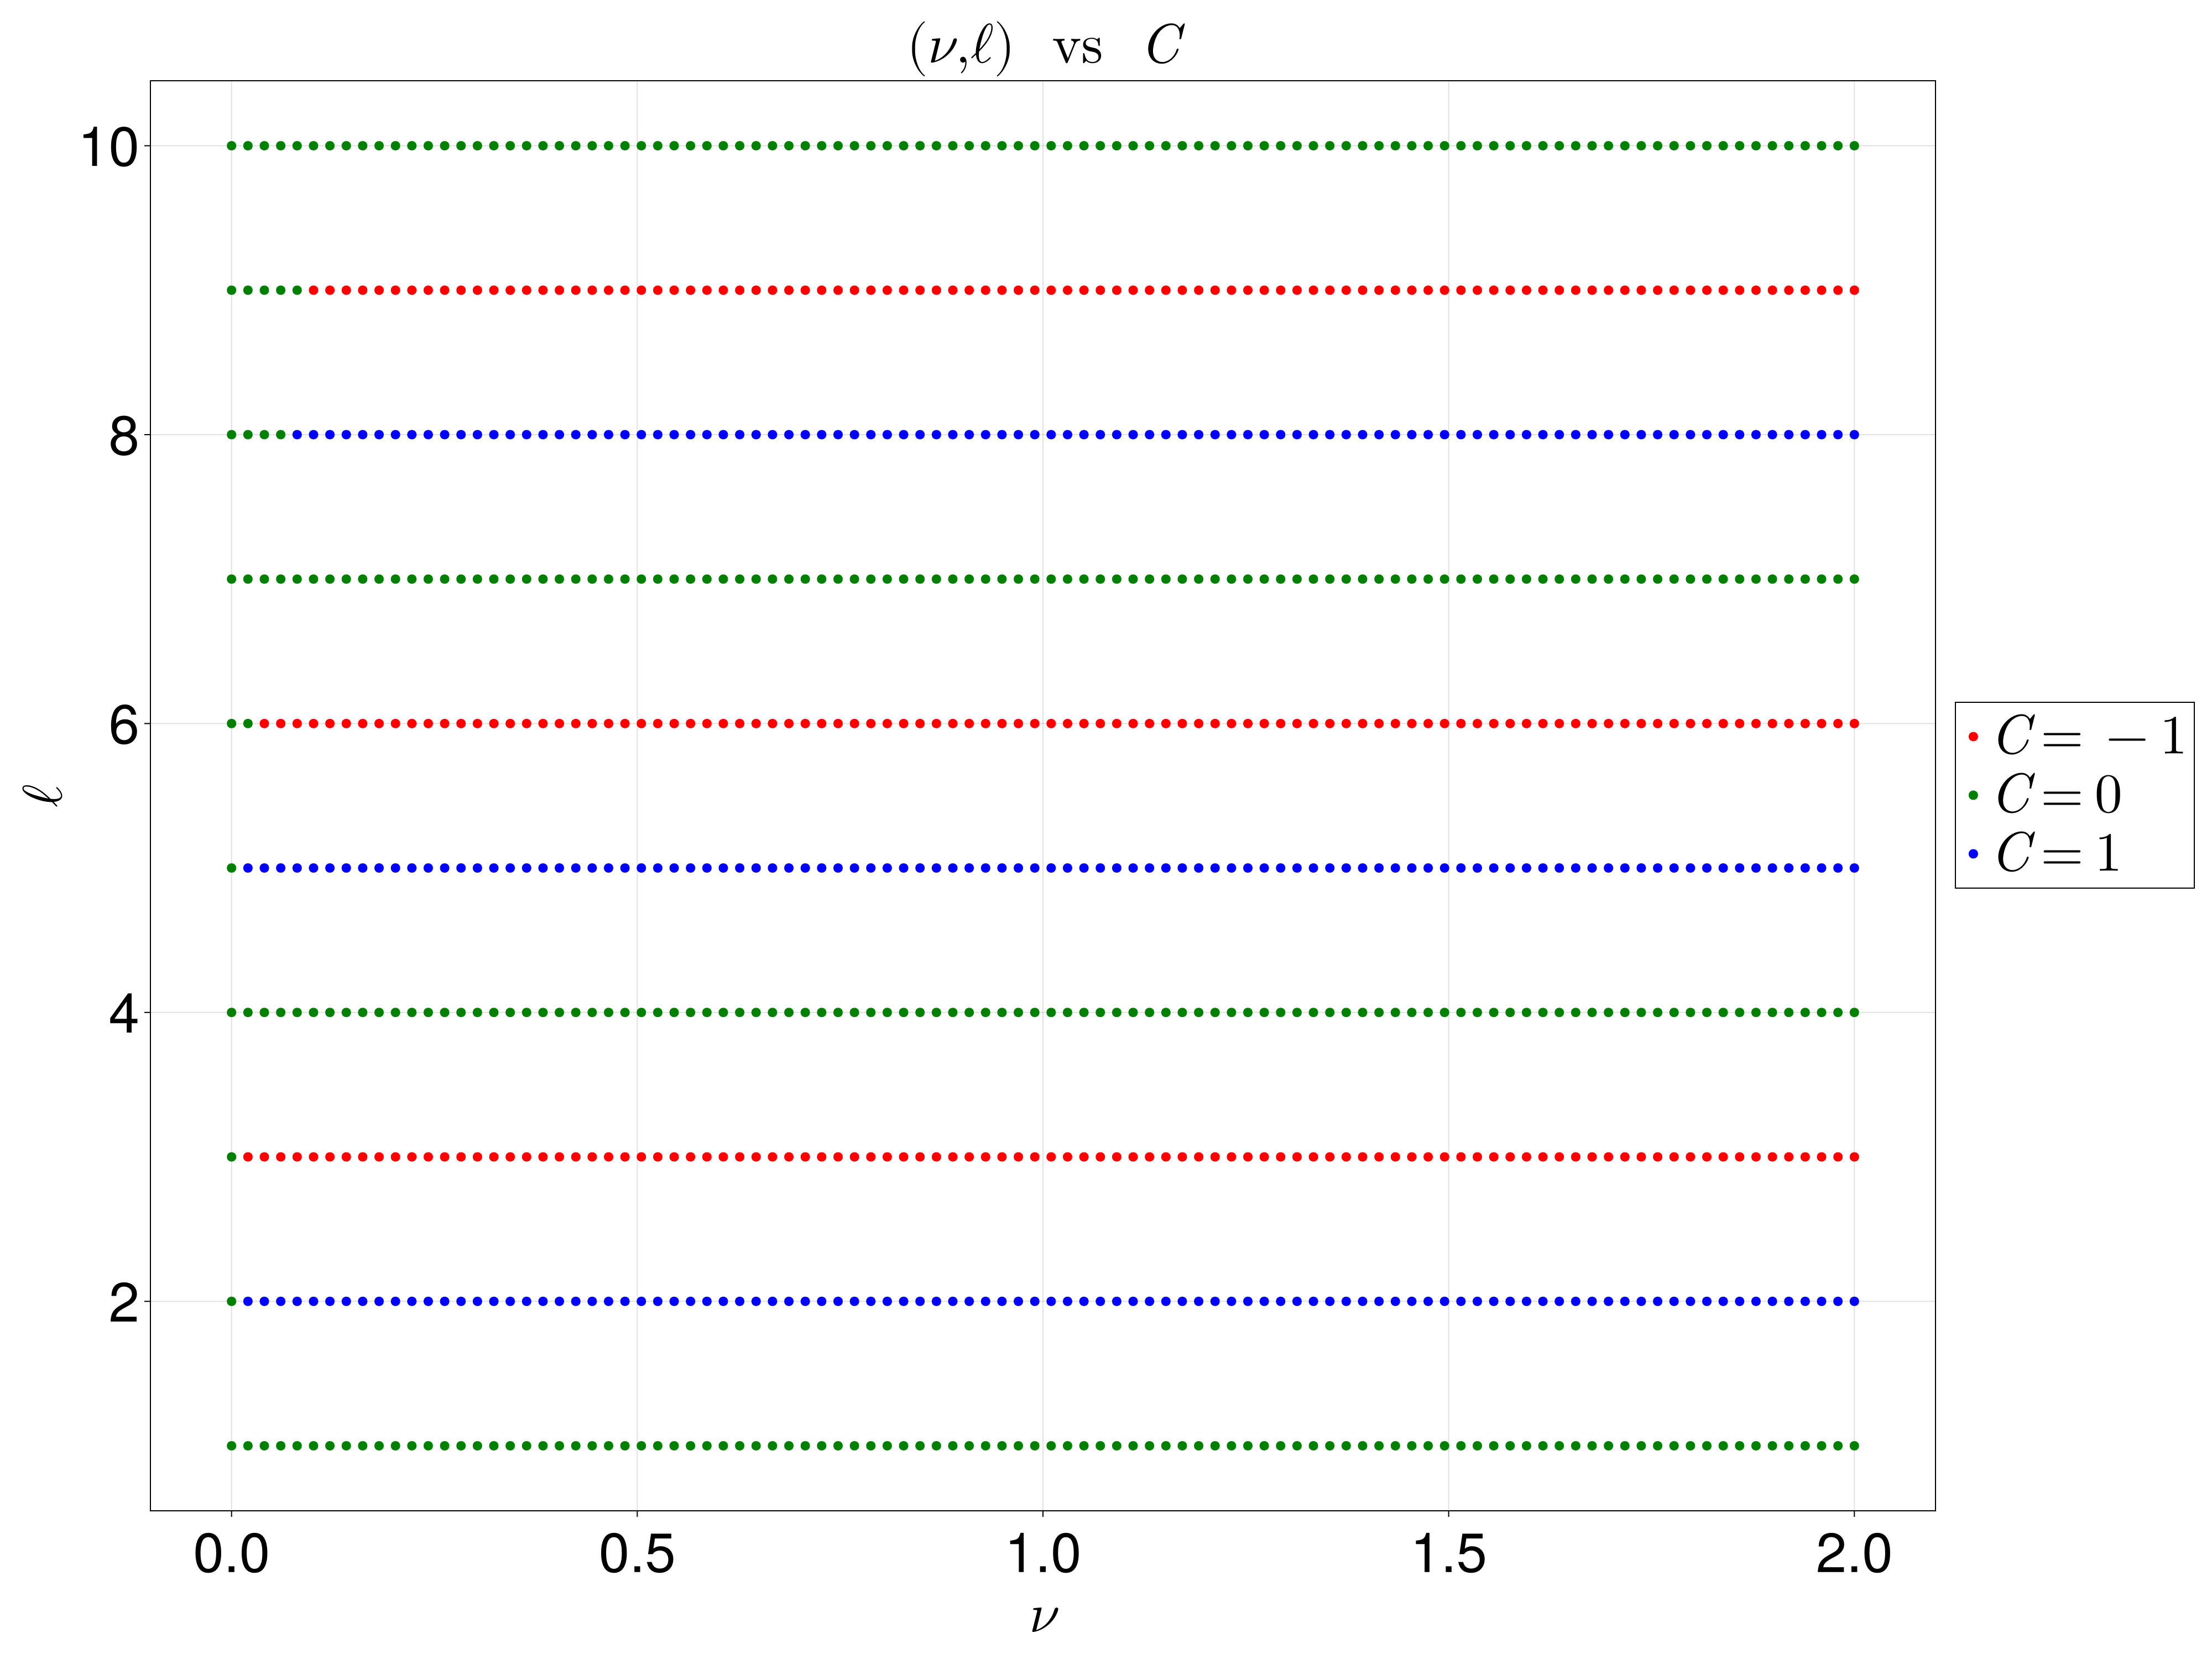

In [18]:
rmg_chern_nu_l_contour(mbz_kappa, NL)